In [1]:
# Visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Model training and related
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from collections import Counter

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv(r"kidney_disease.csv")
data.head(15)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

##### => The columns pcv (packed cell volume), wc (white blood cell count) and rc (red blood cell count) are object type. they should be numerical

In [6]:
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [8]:
# dividing into categorical and numerical columns for label encoding and filling null values

cat_cols = [i for i in data.columns if data[i].dtype=='object']
num_cols = [i for i in data.columns if data[i].dtype!='object']

In [9]:
for i in cat_cols:
    print(i, data[i].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad ['no' 'yes' '\tno' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
classification ['ckd' 'ckd\t' 'notckd']


#### There are ambiguous unique values in dm, cad and classification columns

In [10]:
data['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['cad'] = data['cad'].replace(to_replace = '\tno', value='no')
data['classification'] = data['classification'].replace(to_replace = {'ckd\t': 'ckd'})

In [11]:
for i in cat_cols:
    print(i, data[i].unique())

rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
htn ['yes' 'no' nan]
dm ['yes' 'no' nan]
cad ['no' 'yes' nan]
appet ['good' 'poor' nan]
pe ['no' 'yes' nan]
ane ['no' 'yes' nan]
classification ['ckd' 'notckd']


### Preprocessing

In [12]:
data.isna().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
# filling columns with higher null values with random sample
# filling columns with less null values using mean/mode

def random_sampling(i):
    random_sample = data[i].dropna().sample(data[i].isna().sum())
    random_sample.index = data[data[i].isnull()].index
    data.loc[data[i].isnull(), i] = random_sample
    
def impute_mode(i):
    mode = data[i].mode()[0]
    data[i] = data[i].fillna(mode)

In [14]:
# filling numerical columns using random sampling
for i in num_cols:
    random_sampling(i)
    
# categorical columns having high null values
random_sampling('rc')
random_sampling('pc')

# filling rest of the categorical columns using mode
for i in cat_cols:
    impute_mode(i)

In [15]:
data.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
# it can be seen above that all categorical columns have 2 unique categories.
# hence, we can use label encoder.

le = LabelEncoder()
for i in cat_cols:
    data[i] = le.fit_transform(data[i])


In [17]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,90.0,...,38.0,6000.0,4.9,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,3.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


### Feature selection

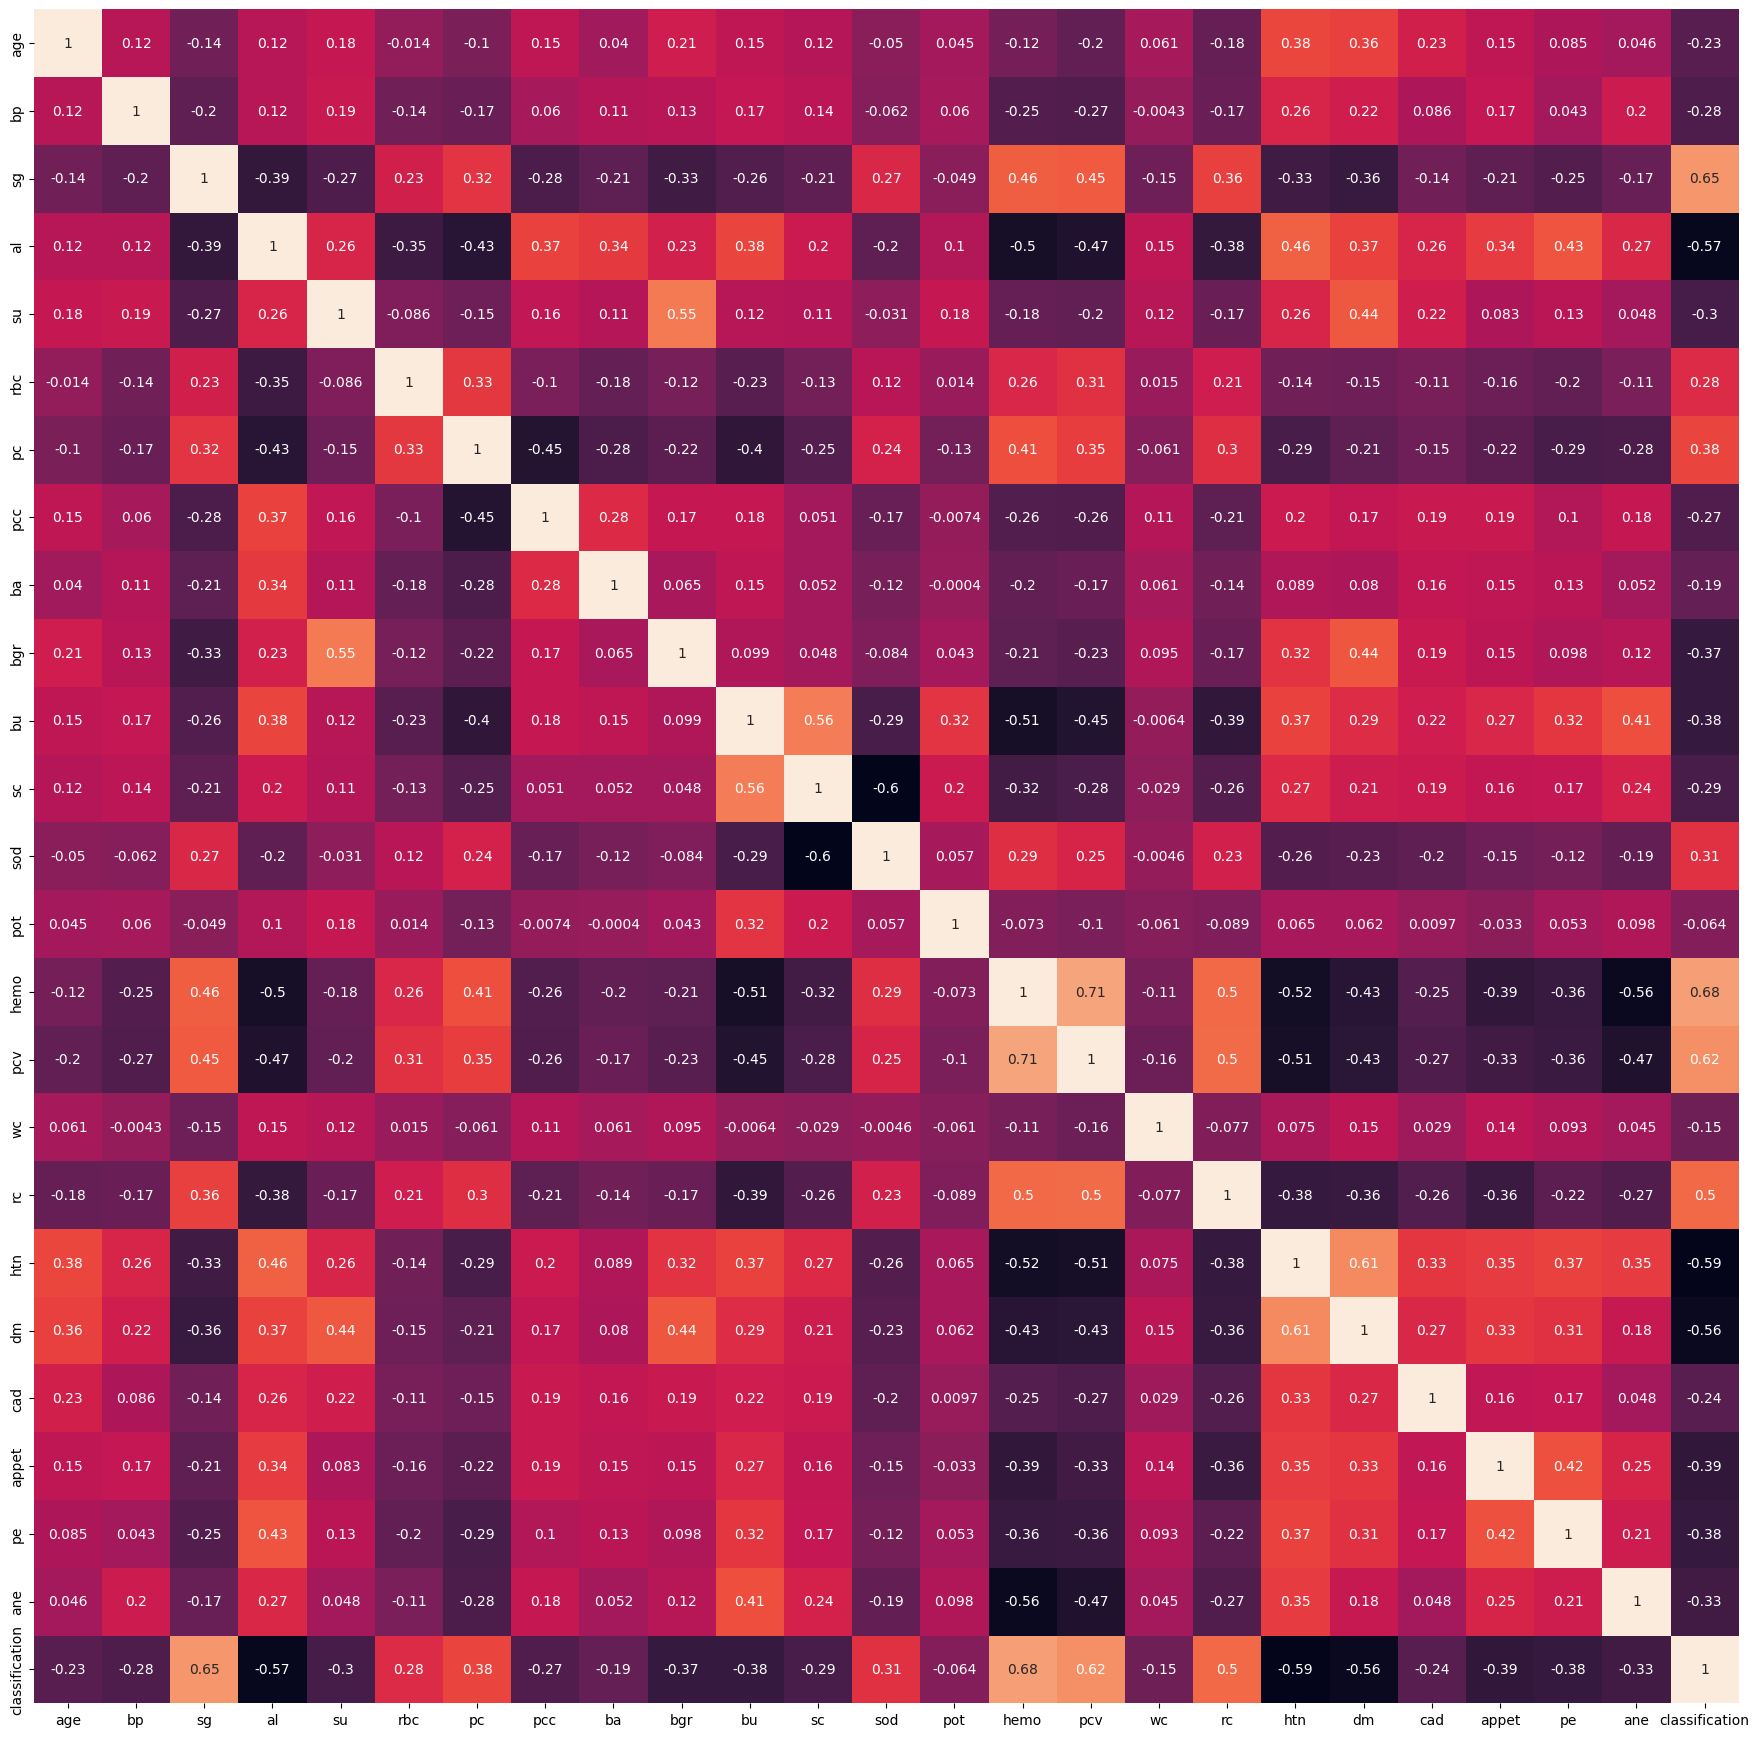

In [18]:
plt.figure(figsize=(22,22))
corr = data.corr()
sns.heatmap(corr, annot=True, cbar=False)
plt.show()

In [19]:
correlation_with_target = abs(corr['classification'])
useful_cols = correlation_with_target[correlation_with_target>=0.2]
cols = [i for i, value in useful_cols.iteritems()]
cols.remove('classification') # removed 'classification' as it is our target variable
print(cols)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'bgr', 'bu', 'sc', 'sod', 'hemo', 'pcv', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [20]:
x = data[cols]
y = data['classification']
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,bgr,bu,...,sod,hemo,pcv,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,121.0,36.0,...,138.0,15.4,44.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,90.0,18.0,...,145.0,11.3,38.0,4.9,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,423.0,53.0,...,150.0,9.6,31.0,3.7,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,117.0,56.0,...,111.0,11.2,32.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,106.0,26.0,...,135.0,11.6,35.0,4.6,0,0,0,0,0,0


In [21]:
x.shape, y.shape

((400, 21), (400,))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### 1) SVC: Support Vector Machine - Classifier

In [24]:
model_1 = SVC()
svc_params = {'C' : range(1, 10),
              'kernel': ['linear', 'rbf'],
              'gamma': [0.01, 0.1, 1, 10, 100]}
svc_grid = GridSearchCV(model_1, param_grid=svc_params, cv=5, n_jobs=-1, verbose=True)
svc_grid.fit(x_train, y_train)
print("Best Parameters: ", svc_grid.best_params_)
svc_pred = svc_grid.predict(x_test)
print("\nAccuracy: ", accuracy_score(svc_pred, y_test))
print("Auc-roc : ", roc_auc_score(svc_pred, y_test))
print("Log-loss: ", log_loss(svc_pred, y_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters:  {'C': 6, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy:  0.9833333333333333
Auc-roc :  0.9826388888888888
Log-loss:  0.5756529365604306


### 2) Logistic Regression

In [25]:
model_2 = LogisticRegression()
lr_params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C': range(1, 10),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [80, 90, 100]}
lr_grid = GridSearchCV(model_2, param_grid=lr_params, cv=5, n_jobs=-1, verbose=True)
lr_grid.fit(x_train, y_train)
print("Best Parameters: ", lr_grid.best_params_)
lr_pred = lr_grid.predict(x_test)
print("\nAccuracy: ", accuracy_score(lr_pred, y_test))
print("Auc-roc : ", roc_auc_score(lr_pred, y_test))
print("Log-loss: ", log_loss(lr_pred, y_test))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters:  {'C': 1, 'max_iter': 80, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy:  0.9833333333333333
Auc-roc :  0.9826388888888888
Log-loss:  0.5756529365604306


### 3) Gaussian Naive-Bayes Classifier

In [26]:
model_3 = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid = GridSearchCV(model_3, param_grid=nb_params, cv=5, n_jobs=-1, verbose=True)
nb_grid.fit(x_train, y_train)
print("Best Parameters: ", nb_grid.best_params_)
nb_pred = nb_grid.predict(x_test)
print("\nAccuracy: ", accuracy_score(nb_pred, y_test))
print("Auc-roc : ", roc_auc_score(nb_pred, y_test))
print("Log-loss: ", log_loss(nb_pred, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'var_smoothing': 0.006579332246575682}

Accuracy:  0.975
Auc-roc :  0.9705882352941176
Log-loss:  0.8634694098727679


### Majority voting using the above 3 models

In [27]:
y_pred = []
for i in range(0, len(x_test)):
    arr = []
    svc_pred = svc_grid.predict(x_test[i].reshape(1, -1))
    lr_pred  = lr_grid.predict(x_test[i].reshape(1, -1))
    nb_pred  = nb_grid.predict(x_test[i].reshape(1, -1))
    
    arr.append(svc_pred[0])
    arr.append(lr_pred[0])
    arr.append(nb_pred[0])
    
    arr = Counter(arr)
    result = arr.most_common(1)[0][0]
    
    y_pred.append(result)
    
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9833333333333333
